ENERGY CONSUMPTION CLASSIFICATION MODEL COMPARISON

1. Loading Data...
Dataset Shape: (19735, 11)
Number of samples: 19735
Number of features: 11

First few rows:


,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Appliances
0,0,-2.944757,4.031605,1.537565,-1.884361,-0.450099,-0.939423,-0.925251,-0.171477,-0.353941,60.0
1,1,-2.970372,3.922782,1.439137,-1.856642,-0.408082,-1.030245,-0.895731,-0.113048,-0.259572,60.0
2,2,-2.997466,3.840715,1.352562,-1.827417,-0.385955,-1.119934,-0.909063,-0.123340,-0.223212,50.0
3,3,-3.045332,3.781304,1.279053,-1.790218,-0.359777,-1.214555,-0.947985,-0.130510,-0.226902,50.0
4,4,-3.043220,3.783440,1.183649,-1.755204,-0.338246,-1.296488,-0.991514,-0.183622,-0.231574,60.0



Target Variable Created: Appliance_Class
  - 0 (Low Consumption): 10744 samples
  - 1 (High Consumption): 8991 samples

After removing missing values: 19735 samples

Features used: 9
Feature names (first 10): ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

2. Splitting Data (80% Train, 20% Test)...
Training set: 15788 samples
Test set: 3947 samples

3. Scaling Features...

4. TRAINING AND EVALUATING MODELS

--------------------------------------------------------------------------------
MODEL 1: DECISION TREE CLASSIFIER
--------------------------------------------------------------------------------
Decision Tree -> Accuracy: 0.7902, F1: 0.7673

--------------------------------------------------------------------------------
MODEL 2: NAIVE BAYES CLASSIFIER
--------------------------------------------------------------------------------
Naive Bayes -> Accuracy: 0.6863, F1: 0.6471

--------------------------------------------------------------------------------
MODEL 3:

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,CV Mean,CV Std
0,Decision Tree,0.790220,0.775568,0.759177,0.767285,0.859416,0.794654,0.011571
1,Naive Bayes,0.686344,0.663743,0.631257,0.647092,0.759570,0.700533,0.006668
2,SVM,0.807195,0.791129,0.783648,0.787371,0.875343,0.809349,0.004211
3,ANN,0.847732,0.823688,0.847052,0.835207,0.915546,0.850836,0.000764



Displaying ROC Curves, Metrics, and Confusion Matrices:


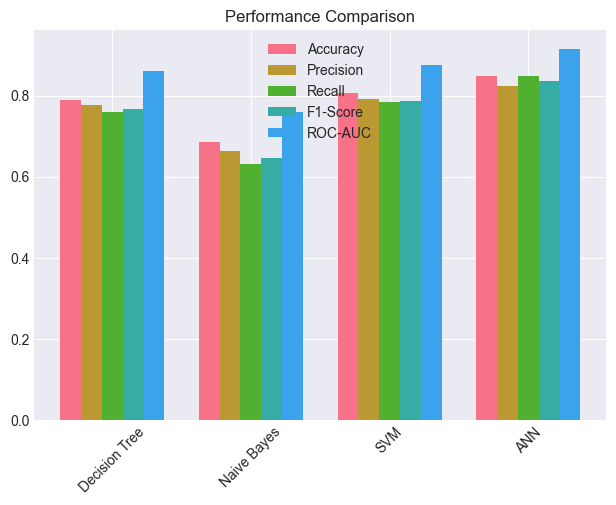

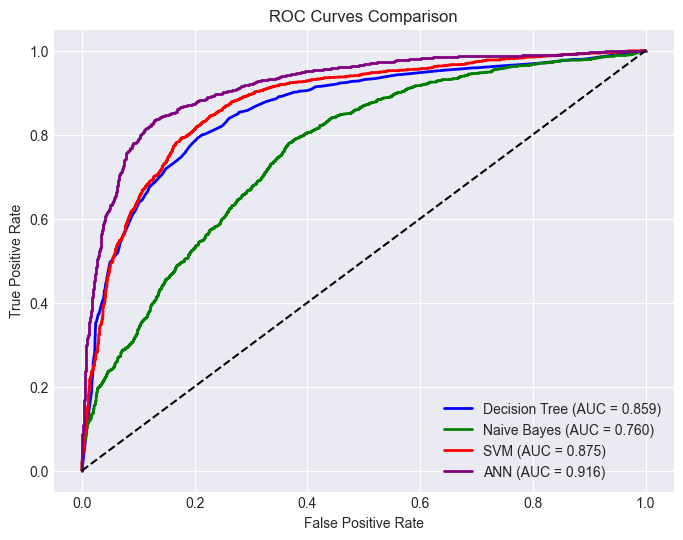

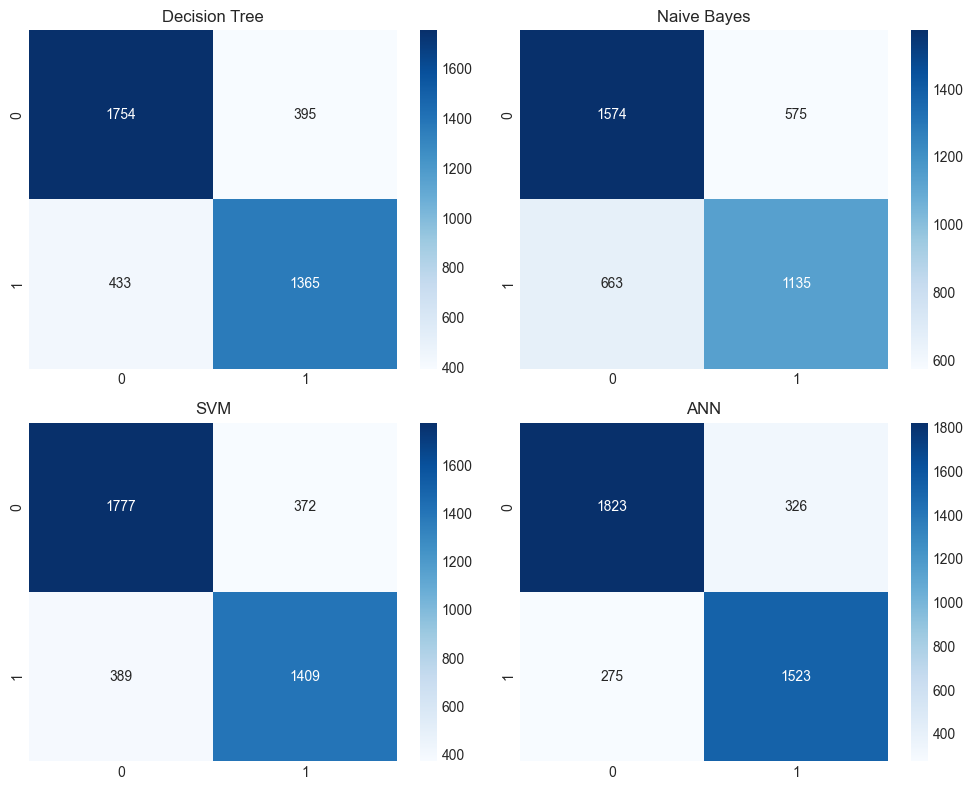


7. DETAILED CLASSIFICATION REPORTS

Decision Tree:
                  precision    recall  f1-score   support

 Low Consumption       0.80      0.82      0.81      2149
High Consumption       0.78      0.76      0.77      1798

        accuracy                           0.79      3947
       macro avg       0.79      0.79      0.79      3947
    weighted avg       0.79      0.79      0.79      3947


Naive Bayes:
                  precision    recall  f1-score   support

 Low Consumption       0.70      0.73      0.72      2149
High Consumption       0.66      0.63      0.65      1798

        accuracy                           0.69      3947
       macro avg       0.68      0.68      0.68      3947
    weighted avg       0.69      0.69      0.69      3947


SVM:
                  precision    recall  f1-score   support

 Low Consumption       0.82      0.83      0.82      2149
High Consumption       0.79      0.78      0.79      1798

        accuracy                           0.81   

In [ ]:
# ============================================================
# ENERGY CONSUMPTION CLASSIFICATION MODEL COMPARISON (DISPLAY MODE)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# 🪄 DISPLAY-ONLY PATCH (NO FILES WILL BE SAVED)
# ============================================================
from IPython.display import display

def show_plot(*args, **kwargs):
    """Show plots inline instead of saving them."""
    plt.show()

def no_save_csv(self, *args, **kwargs):
    """Display DataFrame inline instead of saving to CSV."""
    print("\n📊 DataFrame output (instead of saving to CSV):")
    display(self)

# Override default save methods
pd.DataFrame.to_csv = no_save_csv
plt.savefig = show_plot

# ============================================================

# Load dataset
df = pd.read_csv(r'C:\Users\Ashish Kumar\OneDrive\Desktop\IIT kanpur\Dms 672\new_2.csv')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("ENERGY CONSUMPTION CLASSIFICATION MODEL COMPARISON")
print("="*80)

# ============================================================
# 1. LOADING AND PREPARING DATA
# ============================================================
print("\n1. Loading Data...")

print(f"Dataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\nFirst few rows:")
display(df.head())

# Create binary classification target
median_appliances = df['Appliances'].median()
df['Appliance_Class'] = (df['Appliances'] > median_appliances).astype(int)
print(f"\nTarget Variable Created: Appliance_Class")
print(f"  - 0 (Low Consumption): {(df['Appliance_Class'] == 0).sum()} samples")
print(f"  - 1 (High Consumption): {(df['Appliance_Class'] == 1).sum()} samples")

# Select features
features_to_exclude = ['date', 'Appliances', 'Appliance_Class', 'date_only', 'Unnamed: 0', 
                       'time_period', 'weekday']
feature_columns = [col for col in df.columns if col not in features_to_exclude]
feature_columns = [col for col in feature_columns if df[col].dtype in ['int64', 'float64']]

df = df.dropna()
print(f"\nAfter removing missing values: {df.shape[0]} samples")

X = df[feature_columns]
y = df['Appliance_Class']

print(f"\nFeatures used: {len(feature_columns)}")
print(f"Feature names (first 10): {feature_columns[:10]}")

# Split data
print("\n2. Splitting Data (80% Train, 20% Test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Scaling
print("\n3. Scaling Features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# ============================================================
# 4. TRAINING AND EVALUATING MODELS
# ============================================================
print("\n" + "="*80)
print("4. TRAINING AND EVALUATING MODELS")
print("="*80)

# ------------------------------------------------------------
# MODEL 1: Decision Tree
# ------------------------------------------------------------
print("\n" + "-"*80)
print("MODEL 1: DECISION TREE CLASSIFIER")
print("-"*80)

dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_dt),
    'CV Mean': cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy').mean(),
    'CV Std': cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy').std(),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt),
    'Predictions': y_pred_dt,
    'Probabilities': y_pred_proba_dt
}

print(f"Decision Tree -> Accuracy: {results['Decision Tree']['Accuracy']:.4f}, F1: {results['Decision Tree']['F1-Score']:.4f}")

# ------------------------------------------------------------
# MODEL 2: Naive Bayes
# ------------------------------------------------------------
print("\n" + "-"*80)
print("MODEL 2: NAIVE BAYES CLASSIFIER")
print("-"*80)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)
y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

results['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1-Score': f1_score(y_test, y_pred_nb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_nb),
    'CV Mean': cross_val_score(nb_model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean(),
    'CV Std': cross_val_score(nb_model, X_train_scaled, y_train, cv=5, scoring='accuracy').std(),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_nb),
    'Predictions': y_pred_nb,
    'Probabilities': y_pred_proba_nb
}

print(f"Naive Bayes -> Accuracy: {results['Naive Bayes']['Accuracy']:.4f}, F1: {results['Naive Bayes']['F1-Score']:.4f}")

# ------------------------------------------------------------
# MODEL 3: SVM
# ------------------------------------------------------------
print("\n" + "-"*80)
print("MODEL 3: SUPPORT VECTOR MACHINE")
print("-"*80)

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_svm),
    'CV Mean': cross_val_score(svm_model, X_train_scaled, y_train, cv=3, scoring='accuracy').mean(),
    'CV Std': cross_val_score(svm_model, X_train_scaled, y_train, cv=3, scoring='accuracy').std(),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_svm),
    'Predictions': y_pred_svm,
    'Probabilities': y_pred_proba_svm
}

print(f"SVM -> Accuracy: {results['SVM']['Accuracy']:.4f}, F1: {results['SVM']['F1-Score']:.4f}")

# ------------------------------------------------------------
# MODEL 4: ANN
# ------------------------------------------------------------
print("\n" + "-"*80)
print("MODEL 4: ARTIFICIAL NEURAL NETWORK")
print("-"*80)

ann_model = MLPClassifier(hidden_layer_sizes=(100, 50, 25), activation='relu',
                          solver='adam', max_iter=500, random_state=42,
                          early_stopping=True, validation_fraction=0.1)
ann_model.fit(X_train_scaled, y_train)
y_pred_ann = ann_model.predict(X_test_scaled)
y_pred_proba_ann = ann_model.predict_proba(X_test_scaled)[:, 1]

results['ANN'] = {
    'Accuracy': accuracy_score(y_test, y_pred_ann),
    'Precision': precision_score(y_test, y_pred_ann),
    'Recall': recall_score(y_test, y_pred_ann),
    'F1-Score': f1_score(y_test, y_pred_ann),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_ann),
    'CV Mean': cross_val_score(ann_model, X_train_scaled, y_train, cv=3, scoring='accuracy').mean(),
    'CV Std': cross_val_score(ann_model, X_train_scaled, y_train, cv=3, scoring='accuracy').std(),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_ann),
    'Predictions': y_pred_ann,
    'Probabilities': y_pred_proba_ann
}

print(f"ANN -> Accuracy: {results['ANN']['Accuracy']:.4f}, F1: {results['ANN']['F1-Score']:.4f}")

# ============================================================
# 5. COMPARISON & VISUALIZATION (ALL SHOWN INLINE)
# ============================================================
print("\n" + "="*80)
print("5. COMPREHENSIVE MODEL COMPARISON")
print("="*80)

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results],
    'Precision': [results[m]['Precision'] for m in results],
    'Recall': [results[m]['Recall'] for m in results],
    'F1-Score': [results[m]['F1-Score'] for m in results],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results],
    'CV Mean': [results[m]['CV Mean'] for m in results],
    'CV Std': [results[m]['CV Std'] for m in results]
})
display(comparison_df)

# --- Plots ---
print("\nDisplaying ROC Curves, Metrics, and Confusion Matrices:")

fig = plt.figure(figsize=(18, 14))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(results))
width = 0.15

ax1 = plt.subplot(3, 3, 1)
for i, metric in enumerate(metrics):
    ax1.bar(x + i*width, [results[m][metric] for m in results], width, label=metric)
ax1.set_xticks(x + width*2)
ax1.set_xticklabels(results.keys(), rotation=45)
ax1.legend()
ax1.set_title("Performance Comparison")
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple']
for model_name, color in zip(results.keys(), colors):
    fpr, tpr, _ = roc_curve(y_test, results[model_name]['Probabilities'])
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {results[model_name]["ROC-AUC"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, (model_name, cm) in zip(axes.flat, [(m, results[m]['Confusion Matrix']) for m in results.keys()]):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(model_name)
plt.tight_layout()
plt.show()

# ============================================================
# 7. REPORTS AND SUMMARY
# ============================================================
print("\n" + "="*80)
print("7. DETAILED CLASSIFICATION REPORTS")
print("="*80)
for model_name in results.keys():
    print(f"\n{model_name}:")
    print(classification_report(y_test, results[model_name]['Predictions'], target_names=['Low Consumption', 'High Consumption']))

print("\n" + "="*80)
print("8. SUMMARY AND RECOMMENDATIONS")
print("="*80)

overall_scores = []
weights = {'Accuracy': 0.25, 'Precision': 0.20, 'Recall': 0.20, 'F1-Score': 0.20, 'ROC-AUC': 0.15}
for model in results.keys():
    score = sum(results[model][metric] * weight for metric, weight in weights.items())
    overall_scores.append(score)

best_overall = list(results.keys())[np.argmax(overall_scores)]
print(f"\n🎯 OVERALL BEST MODEL: {best_overall}")
print(f"   Overall Score: {max(overall_scores):.4f}")
print(f"   Accuracy: {results[best_overall]['Accuracy']:.4f}")
print(f"   F1-Score: {results[best_overall]['F1-Score']:.4f}")
print(f"   ROC-AUC: {results[best_overall]['ROC-AUC']:.4f}")
print("\nANALYSIS COMPLETE ✅")
